# 1. Introduction

### 1.1 Introduction

The project aims to analyze an existing diabetes dataset. 
The dataset contains various columns and records, and our goal is to 
determine if a patient had diabetes or not based on this data. 
Using the insights gained from this analysis, we will develop an algorithm 
that can take new patient data and predict the likelihood of diabetes. 
This tool could be very useful for early diagnosis and 
better management of the disease.

### 1.2 Objectives

 1. Create a diabetes outcome algorithm

### 1.3 The Data

Used data sourced from Kaggle 
https://www.kaggle.com/datasets/saurabh00007/diabetescsv

For a diabetes prediction research, the dataset was originally made available. 
To illustrate how early detection can be accomplished using comparable patient data, 
we choose to modify it for our particular situation. We want to demonstrate the efficacy 
of our method in detecting diabetes early on by carefully matching our data 
to the current dataset.

### 1.4 Libraries

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns 
import pandas as pd
import numpy as np

## 2. The Data

### 2.1 Import data

In [8]:
df = pd.read_csv('diabetes.csv')

### 2.2 Understanding the data

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


view of the first five rows

In [10]:
df.shape

(768, 9)

shows that the dataset has 768 rows and 9 columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset consists of 2 Dtypes that is int(7) and float(2) and no missing values

In [13]:
df.duplicated().sum()

0

no duplicates in the dataset

In [12]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


none of the features have a constant value(min is not equal to max)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# 3.0 Exploratory Data Analysis

## 3.1 Outcome feature

In [18]:
# visualization 
features_continuos = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features_categories = ['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

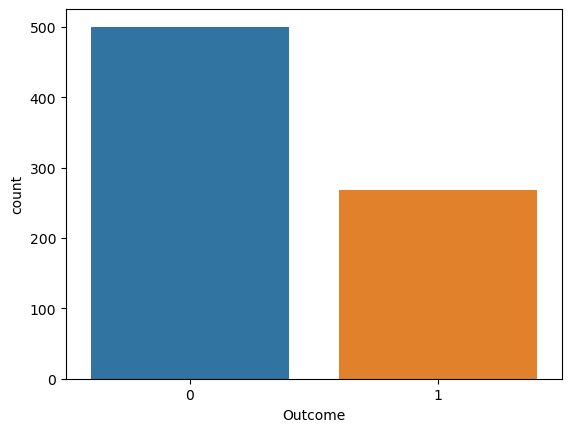

In [15]:
sns.countplot(x='Outcome', data=df)

In [16]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

the dataSet has imbalanced data

## 3.2 the rest of features

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


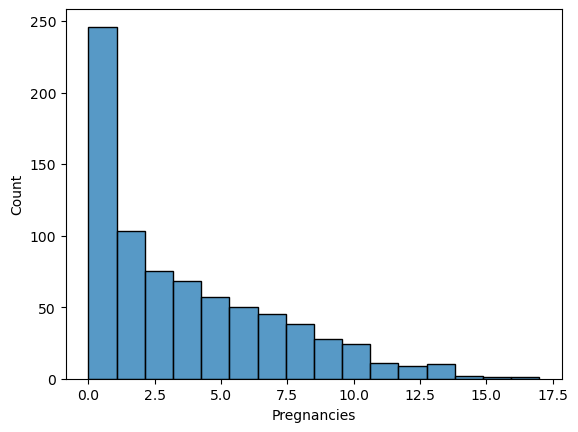

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


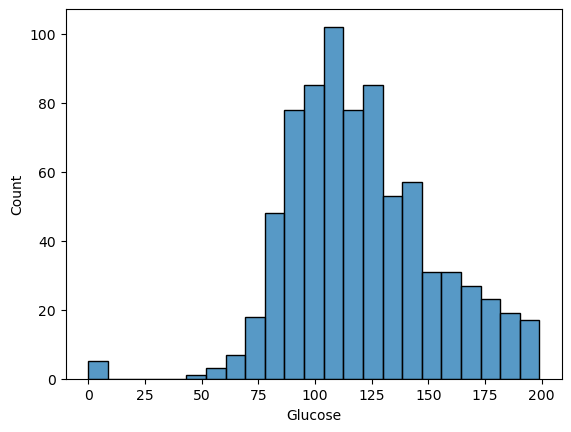

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


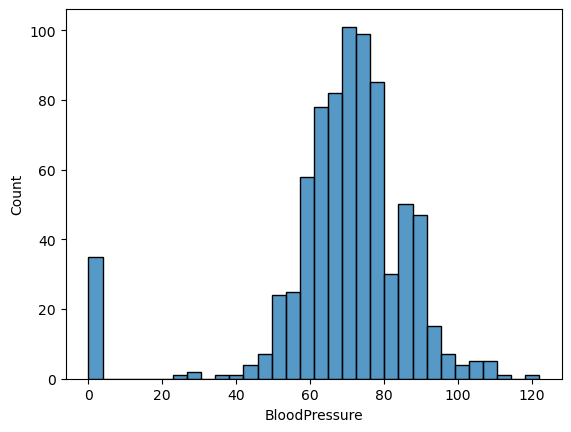

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


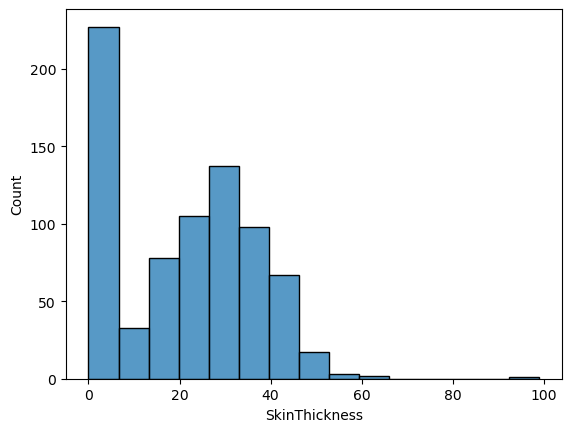

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


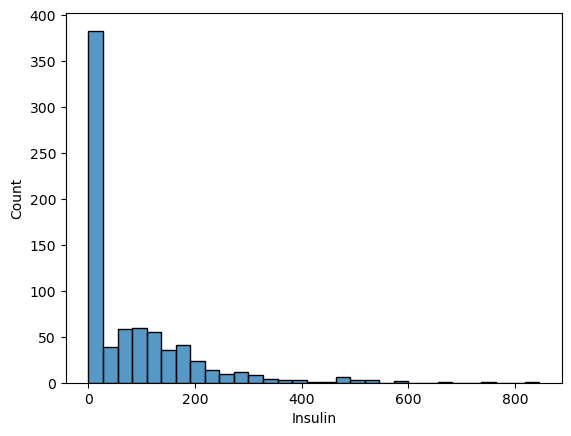

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


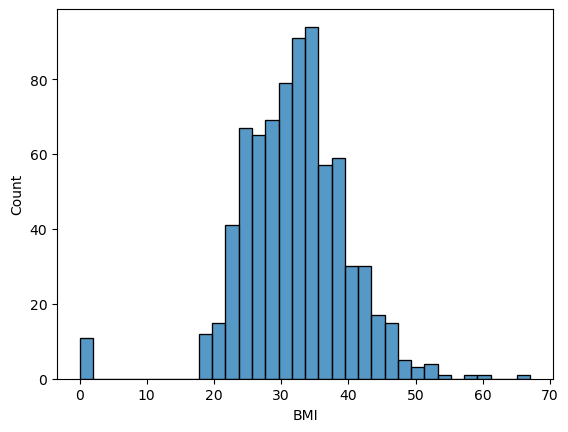

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


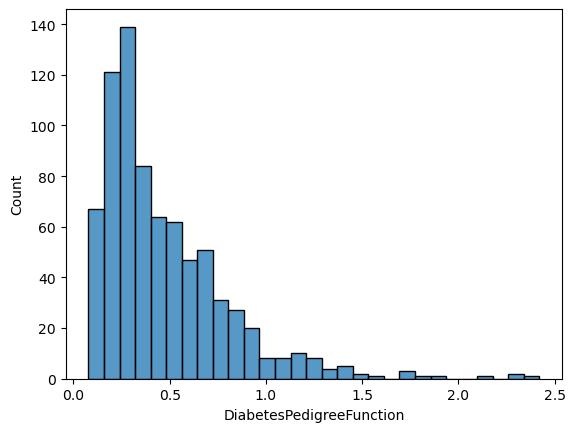

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


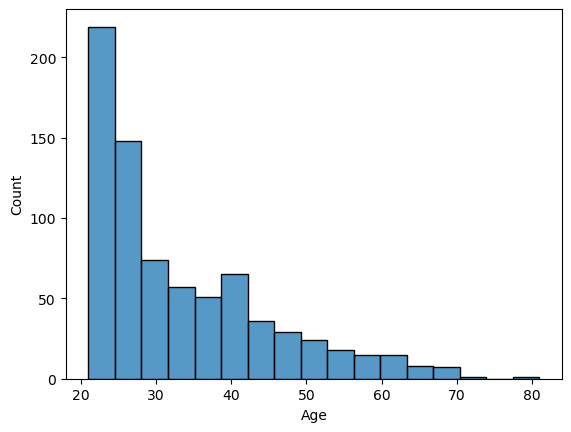

In [27]:
for feature in features_continuos:
    sns.histplot(x=feature, data=df)
    plt.show()

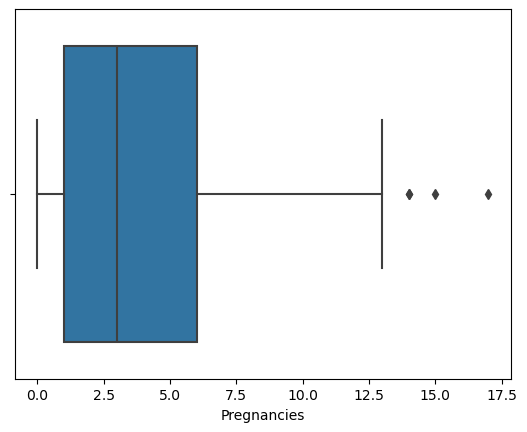

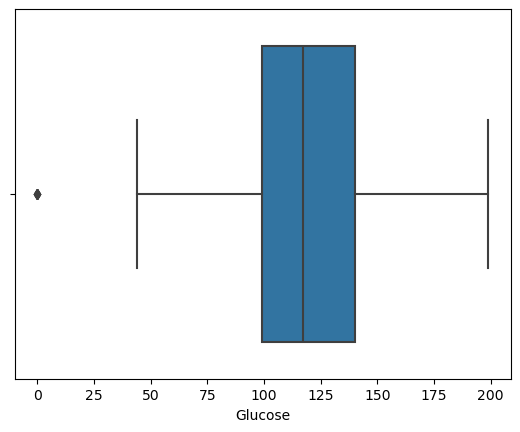

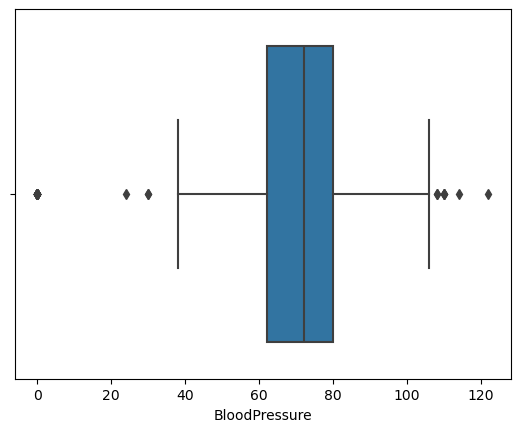

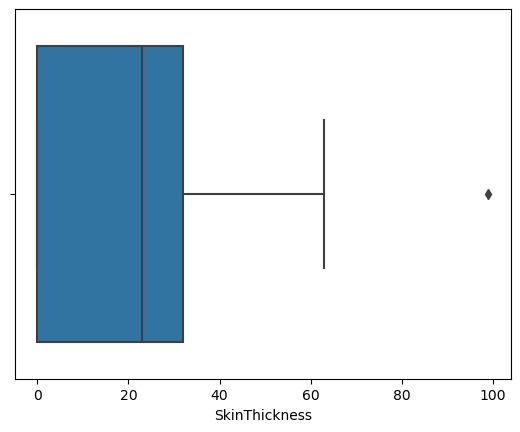

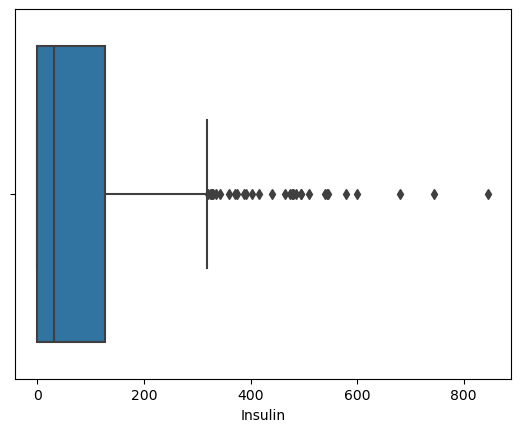

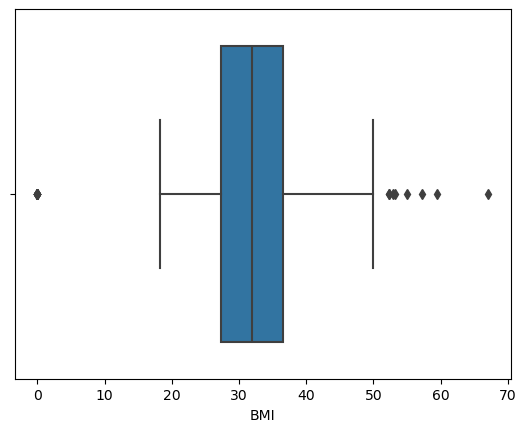

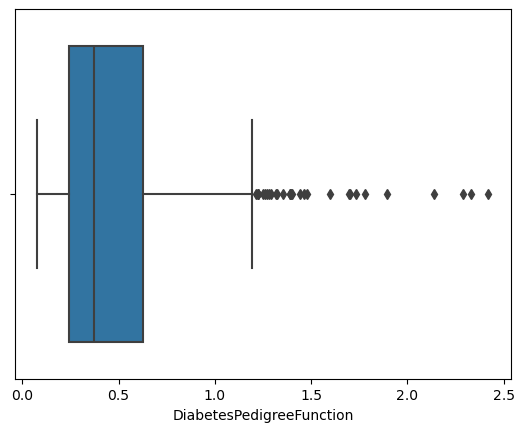

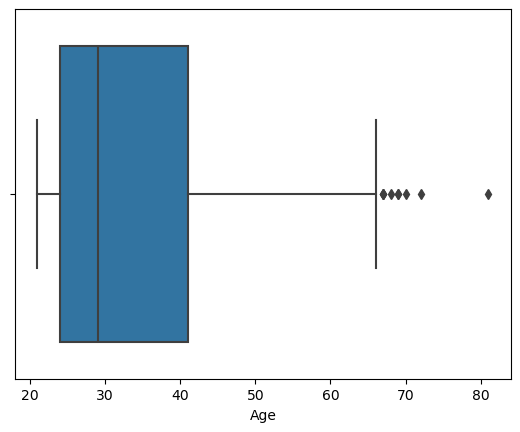

In [25]:
for feature in features_continuos:
    sns.boxplot(data=df, x=feature)
    plt.show()

data set has outliers this will influence the choice of algorithm

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

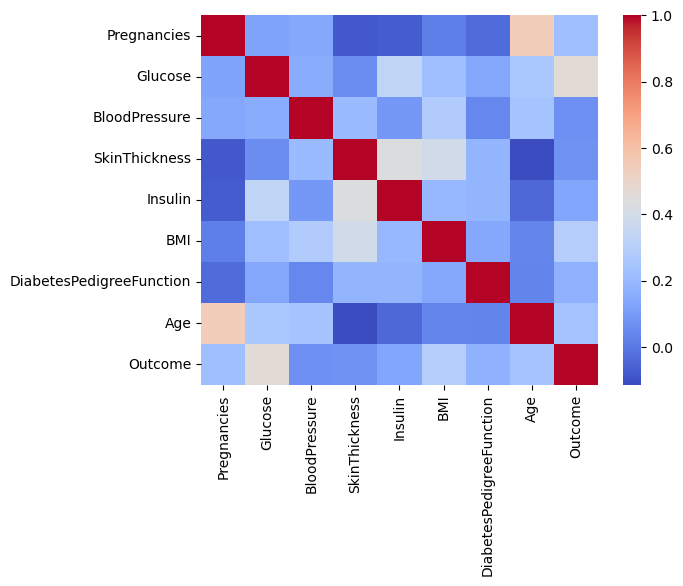

In [15]:
sns.heatmap(df.corr(), cmap='coolwarm')

# 4. Split, train and test

In [21]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

splitting the model into two parts the train part(0.8) and the test part(0.2)
scaled the model using mimmaxscaler

In [22]:
svm= SVC()

svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       101
           1       0.66      0.51      0.57        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



In [23]:
snn = SMOTEENN(random_state=20)
X_train_snn, y_train_snn = snn.fit_resample(X_train, y_train)
X_train_scaled = scaler.transform(X_train_snn)

svm.fit(X_train_scaled, y_train_snn)
svm_pred = svm.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.91      0.60      0.73       101
           1       0.54      0.89      0.67        53

    accuracy                           0.70       154
   macro avg       0.73      0.75      0.70       154
weighted avg       0.78      0.70      0.71       154



In [24]:
from joblib import dump

dump(df, 'diabetic_pred.pkl')

['diabetic_prediction_model.pkl']